<a href="https://colab.research.google.com/github/sr606/Machine-Learning_Practices/blob/main/Copy_of_Decision_tree_Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 82.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 73.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 35.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 25.8MB/s]


In [ ]:
# import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    # X_train = pickle.load(handle)
    X_train = pd.read_pickle("preprocessed_X_sm.pickle")

with open('X_test.pickle', 'rb') as handle:
    # X_test = pickle.load(handle)
    X_test = pd.read_pickle("X_test.pickle")


with open('y_sm.pickle', 'rb') as handle:
    # y_train = pickle.load(handle)
    y_train = pd.read_pickle("y_sm.pickle")


with open('y_test.pickle', 'rb') as handle:
    # y_test = pickle.load(handle)
    y_test = pd.read_pickle("y_test.pickle")

In [ ]:
# train data shape
X_train.shape

import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,0.174089,2,9278,20763,3,1,16,3,4,0,15,3,3,5,4,0,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,21,546,5,1,0.127479,3,1,97,3,1,0.160714,4,3117,26009,1,0,18,3,3,0,3,2,3,2,2,2,2,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,43,422,1,3,0.151584,4,0,33,3,2,0.063158,4,5562,21782,4,0,13,3,2,1,12,2,2,5,2,2,2,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,42,188,29,3,0.127479,2,1,56,1,2,0.243386,4,4272,9558,4,0,19,3,1,0,16,3,3,1,0,0,0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,35,992,1,3,0.127479,4,1,68,2,1,0.243386,1,2450,21731,1,0,19,3,2,0,3,3,3,3,0,1,2,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,41,1077,10,3,0.187471,2,1,85,2,2,0.128849,2,7541,13480,4,0,12,3,2,1,11,2,2,7,4,0,4,0.407817,0.592183,0.0,0.000000,0.407817,0.592183,0.592183,0.000000,0.407817
1844,55,310,7,1,0.239573,3,1,71,3,1,0.243683,2,2339,3667,7,0,11,3,3,0,13,3,1,9,8,8,7,0.000000,0.000000,1.0,0.000000,0.998141,0.001859,0.000000,0.998141,0.001859
1845,36,899,5,2,0.143813,1,0,92,2,1,0.160714,1,2190,20488,4,0,16,3,1,1,5,2,1,3,2,0,2,0.677643,0.322357,0.0,0.000000,1.000000,0.000000,0.677643,0.322357,0.000000
1846,40,292,7,3,0.151584,1,1,84,3,3,0.056921,3,12107,12915,5,0,11,3,4,2,18,3,2,16,7,10,5,0.192577,0.807423,0.0,0.000000,1.000000,0.000000,0.807423,0.192577,0.000000


In [ ]:
y_train

,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
1843,1
1844,1
1845,1
1846,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred= tree_clf.predict(X_test)

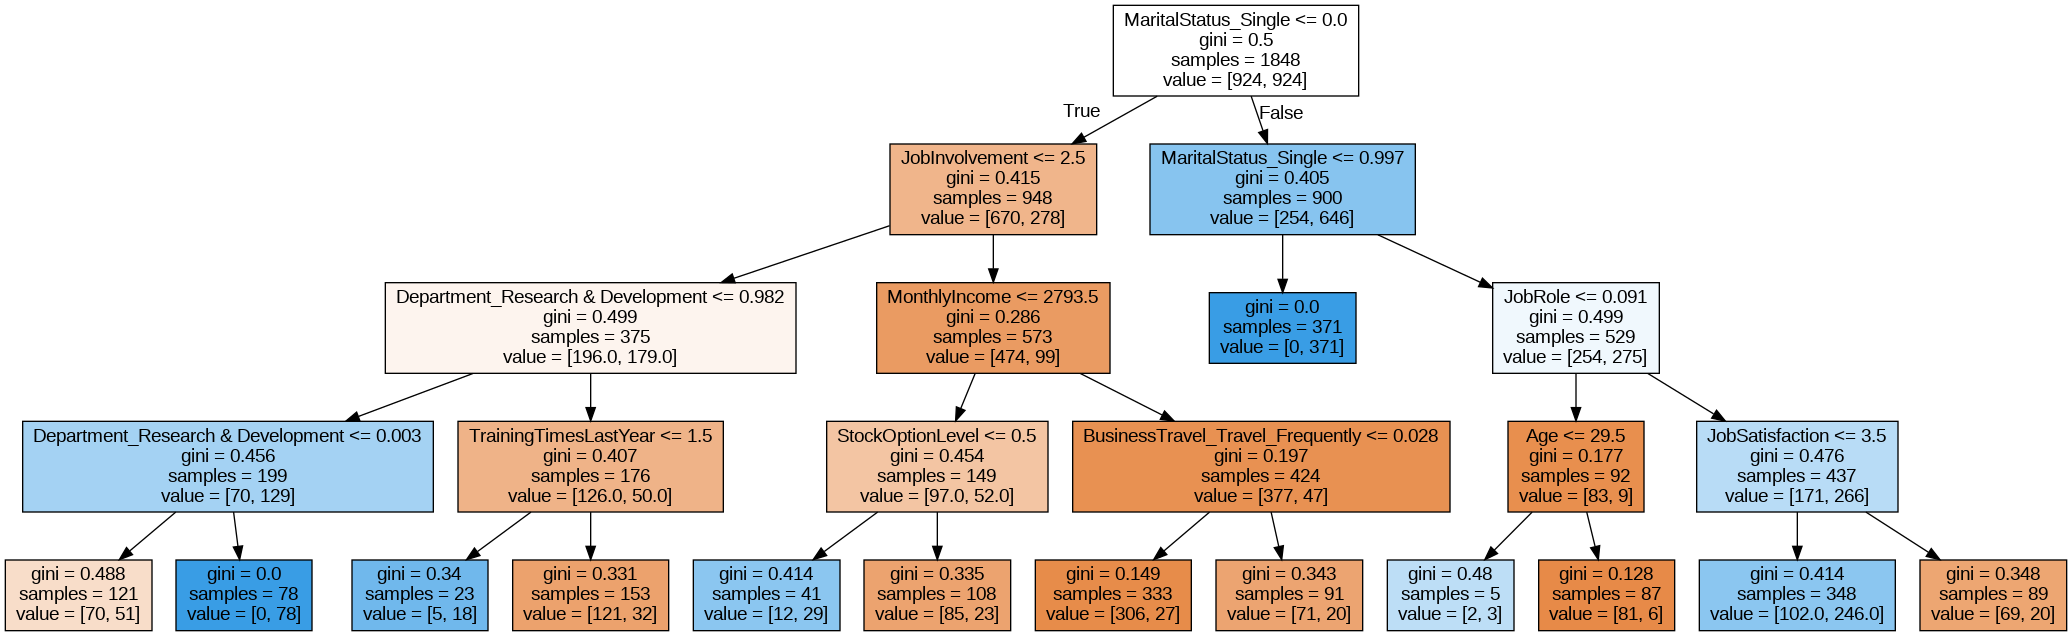

In [ ]:
#To visualize

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Text(0.5, 23.52222222222222, 'Predicted label')

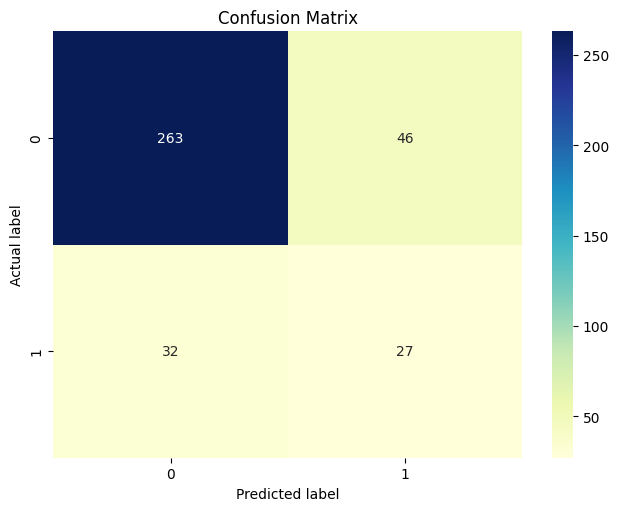

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
pred= tree_clf.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted label')

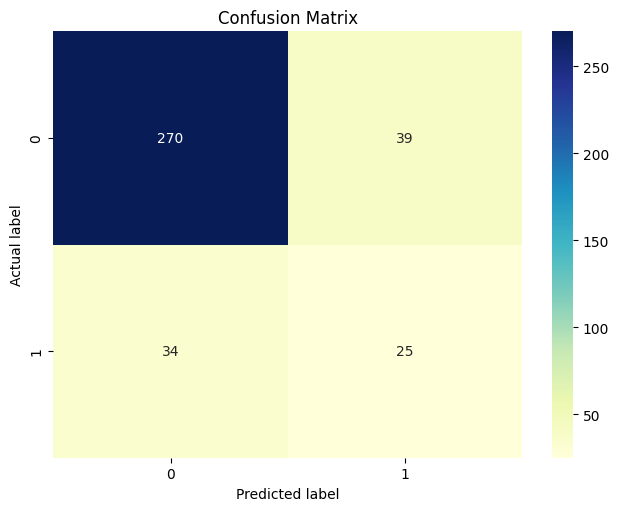

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_train.value_counts(normalize=True) *100

,proportion
Attrition,
0,50.0
1,50.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       309
           1       0.39      0.42      0.41        59

    accuracy                           0.80       368
   macro avg       0.64      0.65      0.64       368
weighted avg       0.81      0.80      0.80       368

